In [ ]:
!unzip image.zip

Archive:  image.zip
   creating: image/
  inflating: image/j1.jpg            
  inflating: image/j10.jpg           
  inflating: image/j11.jpg           
  inflating: image/j12.jpg           
  inflating: image/j13.jpg           
  inflating: image/j14.jpg           
  inflating: image/j15.jpg           
  inflating: image/j16.jpg           
  inflating: image/j17.jpg           
  inflating: image/j18.jpg           
  inflating: image/j19.jpg           
  inflating: image/j2.jpg            
  inflating: image/j20.jpg           
  inflating: image/j21.jpg           
  inflating: image/j22.jpg           
  inflating: image/j23.jpg           
  inflating: image/j24.jpg           
  inflating: image/j25.jpg           
  inflating: image/j26.jpg           
  inflating: image/j27.jpg           
  inflating: image/j28.jpg           
  inflating: image/j29.jpg           
  inflating: image/j3.jpg            
  inflating: image/j30.jpg           
  inflating: image/j31.jpg           
  inflatin

In [ ]:
# Split data set to train and test and val 
import os
import shutil
import random

dataset_path = "./image/"

# Set the path to your train and test directories
train_path = "./train/"
val_path = "./val/"
test_path = "./test/"

# Set the train/validation/test split ratios
train_split_ratio = 0.8
val_split_ratio = 0.1

# Check if the train directory exists, and create it if it doesn't
if not os.path.exists(train_path):
    os.makedirs(train_path)


if not os.path.exists(val_path):
    os.makedirs(val_path)

if not os.path.exists(test_path):
    os.makedirs(test_path)


image_file_names = os.listdir(dataset_path)

# Shuffle the image file names
random.shuffle(image_file_names)


num_train_images = int(len(image_file_names) * train_split_ratio)
num_val_images = int(len(image_file_names) * val_split_ratio)


for i in range(num_train_images):
    image_file_name = image_file_names[i]
    src_path = os.path.join(dataset_path, image_file_name)
    dst_path = os.path.join(train_path, image_file_name)
    shutil.copyfile(src_path, dst_path)


for i in range(num_train_images, num_train_images+num_val_images):
    image_file_name = image_file_names[i]
    src_path = os.path.join(dataset_path, image_file_name)
    dst_path = os.path.join(val_path, image_file_name)
    shutil.copyfile(src_path, dst_path)

# Move the remaining images to the test directory
for i in range(num_train_images+num_val_images, len(image_file_names)):
    image_file_name = image_file_names[i]
    src_path = os.path.join(dataset_path, image_file_name)
    dst_path = os.path.join(test_path, image_file_name)
    shutil.copyfile(src_path, dst_path)




In [ ]:
import os

parent_dir = "./image"

path = []
labels =[] 

for file in os.listdir(parent_dir):
    if file.startswith("j"):
        label = 0  # Jungle
    elif file.startswith("s"):
        label = 1  # Sea
    else:
        continue  
    path.append(file)
    labels.append(label)


In [ ]:
print(path[0])
print(labels[0])

print(path[20])
print(labels[20])

j31.jpg
0
s11.jpg
1


In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [ ]:
blue_means = []

for p in path:
    img = cv2.imread('./image/'+ p)
    blue_means.append(np.mean(img[:, :, 0])) # blue channel mean value


In [ ]:
print(blue_means[0])
print(blue_means[20])

21.519413904849003
213.6633227597145


In [ ]:
# Define the Bayesian classifier function
def bayesian_classifier(values, labels, threshold):
    predictions = []
    for value in values:
        if value > threshold:
            predictions.append(1)
        else:
            predictions.append(0)    
    accuracy = accuracy_score(labels, predictions)
    cm = confusion_matrix(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    return accuracy, cm, precision, recall ,  predictions


thresholds = np.linspace(0, 255, 256)
best_threshold = None
best_accuracy = 0
for threshold in thresholds:
    accuracy, _, _, _ , _ = bayesian_classifier(blue_means, labels, threshold)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold


accuracy, cm, precision, recall , predictions= bayesian_classifier(blue_means, labels, best_threshold)

# Print the results
print('Optimal Threshold:', best_threshold)
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(cm)
print('Precision:', precision)
print('Recall:', recall)

Optimal Threshold: 112.0
Accuracy: 0.926829268292683
Confusion Matrix:
[[40  2]
 [ 4 36]]
Precision: 0.9473684210526315
Recall: 0.9


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined a

In [ ]:
mismatch_indices = [i for i in range(len(labels)) if labels[i] != predictions[i]]

In [ ]:
for i in mismatch_indices:
  print(path[i])

j45.jpg
j44.jpg
s7.jpg
s27.jpg
s24.jpg
s13.jpg


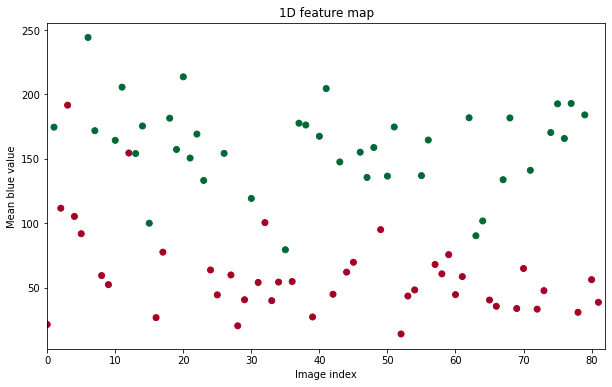

In [ ]:
import matplotlib.pyplot as plt

# Create a figure
fig, ax = plt.subplots()

# Set the x-axis limits
ax.set_xlim(0, len(blue_means))

# Plot the data points
ax.scatter(range(len(blue_means)), blue_means, c=labels, cmap='RdYlGn')

# Set the axis labels and title
ax.set_xlabel('Image index')
ax.set_ylabel('Mean blue value')
ax.set_title('1D feature map')

# Show and save the plot
fig.set_size_inches(10, 6)
fig.savefig('figure.png', dpi=300, bbox_inches='tight')
plt.show()

